# PART 3 - MAPPING RECENT STATION USE

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import re
import string
import datetime
import math

from urllib.parse import urlencode
import urllib.request, json 

import geopandas as gpd
from shapely.geometry import shape

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import random
import plotly.io as pio

In [3]:
path = '../Downloads/202105_tripdata_clean (1).csv'
df = pd.read_csv(path,index_col=0)

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,tripduration
0,E12103A91226099A,docked_bike,2021-05-06 17:25:01,2021-05-06 17:45:25,Broadway & W 60 St,6948.11,1 Ave & E 78 St,7020.09,40.769155,-73.981918,40.771404,-73.953517,member,0 days 00:20:24
1,26A3DC47FE0EA3A3,docked_bike,2021-05-13 12:48:08,2021-05-13 13:07:37,Broadway & W 25 St,6173.08,E 2 St & Avenue B,5515.02,40.742868,-73.989186,40.722174,-73.983688,member,0 days 00:19:29
2,A99F2E1D627B088F,docked_bike,2021-05-16 08:30:13,2021-05-16 08:45:47,46 Ave & 5 St,6286.02,34th Ave & Vernon Blvd,6873.01,40.747310,-73.954510,40.765354,-73.939863,member,0 days 00:15:34
3,43E79A45997B7390,docked_bike,2021-05-01 08:38:14,2021-05-01 08:54:27,46 Ave & 5 St,6286.02,34th Ave & Vernon Blvd,6873.01,40.747310,-73.954510,40.765354,-73.939863,member,0 days 00:16:13
4,8B3CC649F4F58816,docked_bike,2021-05-09 08:12:31,2021-05-09 08:27:05,46 Ave & 5 St,6286.02,34th Ave & Vernon Blvd,6873.01,40.747310,-73.954510,40.765354,-73.939863,member,0 days 00:14:34


In [5]:
print(df.shape)
print(df.dtypes)

(2724165, 14)
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
tripduration           object
dtype: object


In [6]:
counts = df[['start_station_id','end_station_id']].nunique()
print(counts)

start_station_id    2480
end_station_id      2405
dtype: int64


In [7]:
counts.agg('product')

5964400

In [25]:
df[['start_station_name','end_station_name']].\
     value_counts().count()

381823

In [26]:
print(df.shape)

(2669019, 14)


In [27]:
df = df.drop(df.index[(df['start_lat'] == df['end_lat'])&(df['start_lng'] == df['end_lng'])])
df = df.drop(df.index[(df['start_lng'] == df['end_lng'])&(df['start_lat'] == df['end_lat'])])
print (len(df2))

2669019


In [28]:
print(df.shape)

(2669019, 14)


In [37]:
df = df[df.start_lng.notnull()]
df = df[df.start_lat.notnull()]
df = df[df.end_lng.notnull()]
df = df[df.end_lat.notnull()]

In [ ]:
df = df[['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 
         'start_lat','start_lng','end_lat','end_lng']]
print(df.columns)

In [ ]:
from shapely.geometry import Point # this package function is required to create point geometry

In [30]:
# Create a geometry colomn using latitude and longitude
geometry = [Point(xy) for xy in zip(df['start_lng'],df['start_lat'])]

# Setting CRS (EPSG:2263) and convert to geopandas dataframe
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)
# gdf = gdf.to_crs(2263)

gdf.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,tripduration,geometry
0,E12103A91226099A,docked_bike,2021-05-06 17:25:01,2021-05-06 17:45:25,Broadway & W 60 St,6948.11,1 Ave & E 78 St,7020.09,40.769155,-73.981918,40.771404,-73.953517,member,0 days 00:20:24,POINT (-73.98192 40.76915)
1,26A3DC47FE0EA3A3,docked_bike,2021-05-13 12:48:08,2021-05-13 13:07:37,Broadway & W 25 St,6173.08,E 2 St & Avenue B,5515.02,40.742868,-73.989186,40.722174,-73.983688,member,0 days 00:19:29,POINT (-73.98919 40.74287)
2,A99F2E1D627B088F,docked_bike,2021-05-16 08:30:13,2021-05-16 08:45:47,46 Ave & 5 St,6286.02,34th Ave & Vernon Blvd,6873.01,40.747310,-73.954510,40.765354,-73.939863,member,0 days 00:15:34,POINT (-73.95451 40.74731)
3,43E79A45997B7390,docked_bike,2021-05-01 08:38:14,2021-05-01 08:54:27,46 Ave & 5 St,6286.02,34th Ave & Vernon Blvd,6873.01,40.747310,-73.954510,40.765354,-73.939863,member,0 days 00:16:13,POINT (-73.95451 40.74731)
4,8B3CC649F4F58816,docked_bike,2021-05-09 08:12:31,2021-05-09 08:27:05,46 Ave & 5 St,6286.02,34th Ave & Vernon Blvd,6873.01,40.747310,-73.954510,40.765354,-73.939863,member,0 days 00:14:34,POINT (-73.95451 40.74731)


<AxesSubplot:>

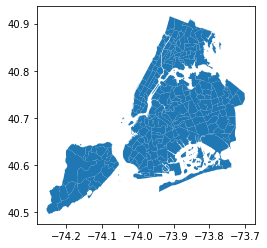

In [31]:
nta = pd.read_json('https://data.cityofnewyork.us/resource/q2z5-ai38.json')
nta['the_geom'] = nta['the_geom'].apply(shape)
nta = gpd.GeoDataFrame(nta, crs="EPSG:4326").set_geometry('the_geom')
# nta = nta.to_crs(2263)
nta.plot()

In [32]:
gdf = gdf[gdf['start_lat'].notnull()]
print (len(gdf))

2669019


<AxesSubplot:>

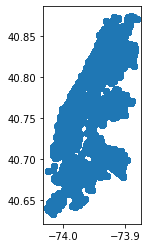

In [33]:
gdf.plot()

In [34]:
gdf_nta = gpd.sjoin(gdf, nta, how='left')
gdf_nta.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,tripduration,geometry,index_right,boro_name,boro_code,county_fips,ntacode,ntaname,shape_leng,shape_area
0,E12103A91226099A,docked_bike,2021-05-06 17:25:01,2021-05-06 17:45:25,Broadway & W 60 St,6948.11,1 Ave & E 78 St,7020.09,40.769155,-73.981918,...,0 days 00:20:24,POINT (-73.98192 40.76915),112,Manhattan,1,61,MN14,Lincoln Square,19869.593926,1.580554e+07
1,26A3DC47FE0EA3A3,docked_bike,2021-05-13 12:48:08,2021-05-13 13:07:37,Broadway & W 25 St,6173.08,E 2 St & Avenue B,5515.02,40.742868,-73.989186,...,0 days 00:19:29,POINT (-73.98919 40.74287),70,Manhattan,1,61,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,45490.581056,3.705659e+07
2,A99F2E1D627B088F,docked_bike,2021-05-16 08:30:13,2021-05-16 08:45:47,46 Ave & 5 St,6286.02,34th Ave & Vernon Blvd,6873.01,40.747310,-73.954510,...,0 days 00:15:34,POINT (-73.95451 40.74731),166,Queens,4,81,QN31,Hunters Point-Sunnyside-West Maspeth,74520.173457,1.024191e+08
3,43E79A45997B7390,docked_bike,2021-05-01 08:38:14,2021-05-01 08:54:27,46 Ave & 5 St,6286.02,34th Ave & Vernon Blvd,6873.01,40.747310,-73.954510,...,0 days 00:16:13,POINT (-73.95451 40.74731),166,Queens,4,81,QN31,Hunters Point-Sunnyside-West Maspeth,74520.173457,1.024191e+08
4,8B3CC649F4F58816,docked_bike,2021-05-09 08:12:31,2021-05-09 08:27:05,46 Ave & 5 St,6286.02,34th Ave & Vernon Blvd,6873.01,40.747310,-73.954510,...,0 days 00:14:34,POINT (-73.95451 40.74731),166,Queens,4,81,QN31,Hunters Point-Sunnyside-West Maspeth,74520.173457,1.024191e+08


In [35]:
df6_nta = gdf_nta[['start_station_id','ntacode','start_station_name']].groupby(['ntacode','start_station_name']).count()
df6_nta.head()

start_station_id
ntacode start_station_name                               
BK09    Brooklyn Bridge Park - Pier 2                2231
        Clark St & Henry St                          3798
        Clinton St & Joralemon St                    2356
        Clinton St & Tillary St                      1529
        Columbia Heights & Cranberry St              1829

<AxesSubplot:>

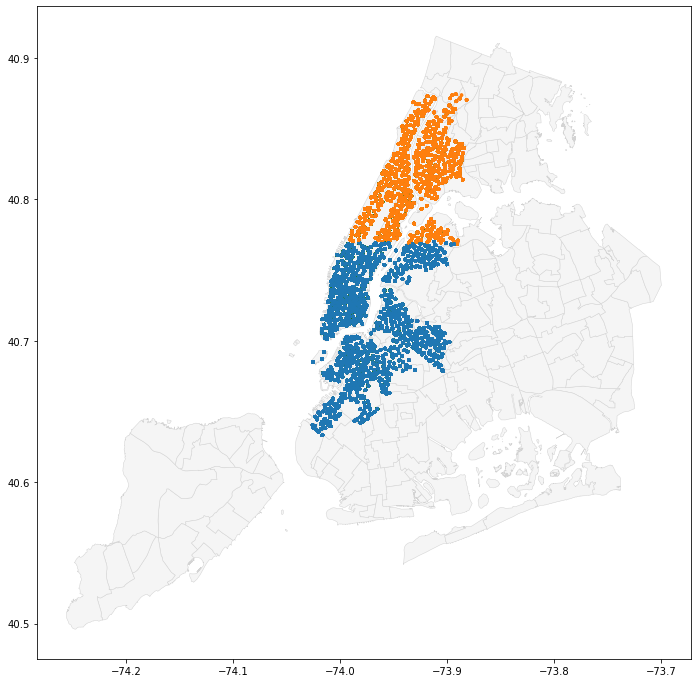

In [36]:
#plot the NTA and the location of the bike stations
ax = nta.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
gdf.plot(ax=ax, column = "start_station_id", markersize=6, vmax=9000)